In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential, load_model, Model
from keras.applications.mobilenet import MobileNet

In [15]:
model = Sequential()
mobilenet = MobileNet()

for layer in range(len(mobilenet.layers)-1):
    model.add(mobilenet.layers[layer])

for layer in model.layers[:-9]:
    layer.trainable = False

model.add(Dense(2, activation = 'softmax'))

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
mobilenet = MobileNet(include_top = False)
x = mobilenet.output

x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)

preds = Dense(2,activation='softmax')(x)

model = Model(inputs = mobilenet.input, outputs=preds)

for layer in model.layers[:-9]:
    layer.trainable = False

In [17]:
model.save('mdl.h5')
mdl = load_model('mdl.h5')

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0   

In [14]:
dir=os.listdir(r'C:\Users\Shiva Prasad\Downloads\NIC\p9\Project\dataset')

X = []
y = []
for i in os.listdir(r'C:\Users\Shiva Prasad\Downloads\NIC\p9\Project\dataset\with_mask'):
    img = load_img(r'C:\Users\Shiva Prasad\Downloads\NIC\p9\Project\dataset\with_mask/'+str(i), target_size = (224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    X.append(img)
    y.append([1,0])

for i in os.listdir(r'C:\Users\Shiva Prasad\Downloads\NIC\p9\Project\dataset\without_mask'):
    img = load_img(r'C:\Users\Shiva Prasad\Downloads\NIC\p9\Project\dataset\without_mask/'+str(i), target_size = (224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    X.append(img)
    y.append([0,1])

data = np.array(X)
labels = np.array(y)

In [3]:
print(dir)

['without_mask', 'with_mask']


In [8]:
len(os.listdir(r'C:\Users\Shiva Prasad\Downloads\NIC\p9\Project\dataset\with_mask'))


884

In [16]:
data

array([[[[-0.5529412 , -0.5058824 , -0.7254902 ],
         [-0.6392157 , -0.5764706 , -0.7647059 ],
         [-0.654902  , -0.58431375, -0.7490196 ],
         ...,
         [-0.6784314 , -0.654902  , -0.8039216 ],
         [-0.75686276, -0.7254902 , -0.9372549 ],
         [-0.7176471 , -0.6784314 , -0.85882354]],

        [[-0.6       , -0.5529412 , -0.75686276],
         [-0.64705884, -0.58431375, -0.77254903],
         [-0.6392157 , -0.5686275 , -0.73333335],
         ...,
         [-0.49019605, -0.4588235 , -0.5764706 ],
         [-0.8039216 , -0.7647059 , -0.94509804],
         [-0.70980394, -0.64705884, -0.827451  ]],

        [[-0.62352943, -0.5764706 , -0.78039217],
         [-0.6392157 , -0.5764706 , -0.7647059 ],
         [-0.62352943, -0.5529412 , -0.7176471 ],
         ...,
         [-0.6       , -0.5529412 , -0.6627451 ],
         [-0.827451  , -0.7647059 , -0.94509804],
         [-0.7019608 , -0.6313726 , -0.78039217]],

        ...,

        [[-0.5294118 , -0.4352941 , -0

In [34]:
labels

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [4]:
np.save('data',data)
np.save('labels',labels)

In [32]:
labels.shape

(1664, 2)

In [5]:
data.shape

(1664, 224, 224, 3)

In [19]:
(trainX, testX, trainY, testY) = train_test_split(data, labels)

In [20]:
print(len(trainX), len(testX), len(trainY), len(testY))

1248 416 1248 416


In [21]:
#model.compile(loss="binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])


In [23]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
History = model.fit( trainX, trainY, epochs = 20, batch_size = 32, validation_split = 0.1)

Epoch 1/20
36/36 [==============================] - 35s 831ms/step - loss: 0.4744 - accuracy: 0.8389 - val_loss: 2.3874 - val_accuracy: 0.5760
Epoch 2/20
36/36 [==============================] - 30s 823ms/step - loss: 0.0827 - accuracy: 0.9737 - val_loss: 0.6377 - val_accuracy: 0.8960
Epoch 3/20
36/36 [==============================] - 29s 809ms/step - loss: 9.7431e-04 - accuracy: 1.0000 - val_loss: 0.0812 - val_accuracy: 0.9920
Epoch 4/20
36/36 [==============================] - 29s 813ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0601 - val_accuracy: 0.9920
Epoch 5/20
36/36 [==============================] - 29s 806ms/step - loss: 0.0089 - accuracy: 0.9952 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 6/20
36/36 [==============================] - 29s 813ms/step - loss: 0.0017 - accuracy: 0.9989 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/20
36/36 [==============================] - 29s 814ms/step - loss: 2.5185e-04 - accuracy: 1.0000 - val_loss: 2.7433e-04 - val_accu

In [24]:
model.evaluate(testX , testY)

13/13 [==============================] - 10s 725ms/step - loss: 3.8399e-08 - accuracy: 1.0000


[3.83990226282549e-08, 1.0]

In [25]:
model.save('MaskNet1.hdf5')

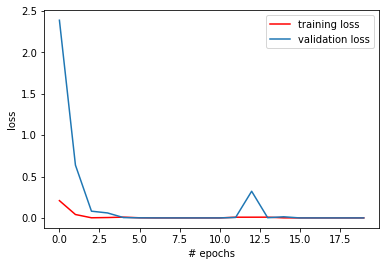

In [26]:
plt.plot(History.history['loss'],'r',label='training loss')
plt.plot(History.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

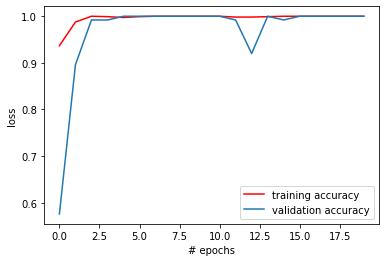

In [27]:
plt.plot(History.history['accuracy'],'r',label='training accuracy')
plt.plot(History.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()